In [1]:
# загружаю библиотеки

import os
import pandas as pd
import numpy as np
import re
import pickle
import seaborn as sns

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

from  more_itertools import unique_everseen

# Гипотезы:  
1) Показатель Global Innovation Index коррелирует с Gross Natural Income (GNI). Будем считать наличие кореляции, если pvalue теста Стьюднента буде менее 0.0005.  
2) Gross Natural Income коррелирует с показателями государственной поддержкой экономики. Будем считать наличие кореляции, если pvalue теста Стьюднента будет < __0.0005__.

### Диверсированные показателями государственной поддержкой экономики:

Я выбрал 37 показателей, которые могут характеризовать государственную поддержку и 5 интегральных позателей:

___1.1.	Political environment (интегральный покозатель)___  
1.1.1.	Political stability and absence of violence/terrorism  
1.1.2.	Government effectiveness  
1.1.3.	Press freedom  

___1.2.	Regulatory environment (интегральный покозатель)___  
1.2.1.	Regulatory quality  
1.2.2.	Rule of law  
1.2.3.	Cost of redundancy dismissal  

___1.3.	Business environment (интегральный покозатель)___  
1.3.1.	Ease of starting a business  
1.3.2.	Ease of resolving insolvency  
1.3.3.	Ease of paying taxes  

2.1.1.	Expenditure on education  
2.1.2.	Public expenditure on education per pupil  

2.1.5.	Pupil-teacher ratio, secondary  

2.2.1.	Tertiary enrolment  
2.2.2.	Graduates in science and engineering  

2.3.1.	Researchers  
2.3.2.	Gross expenditure on R&D (GERD)  

3.1.3.	Government's online service  

3.2.1.	Electricity output  
3.2.3.	Logistics performance  

3.3.2.	Environmental performance  


___4.1.	Credit (интегральный покозатель)___  
4.1.1.	Ease of getting credit  
4.1.2.	Domestic credit to private sector  
4.1.3.	Microfinance institutions' gross loan portfolio  

4.2.1.	Ease of protecting investors  

4.2.4.	Venture capital deals  

4.3.2.	Market access for non-agricultural exports  
4.3.3.	Intensity of local competition  

5.1.2.	Firms offering formal training  

___5.2.	Innovation linkages (интегральный покозатель)___   
5.2.1.	University/industry research collaboration  
5.2.2.	State of cluster development  
5.2.3.	GERD financed by abroad  
5.2.4.	Joint venture/strategic alliance deals  
5.2.5.	Patent families filed in at least three offices  

5.3.1.	Royalties and license fees payments (% of service imports)  
5.3.4.	Foreign direct investment net inflows  

6.1.2.	Patent Cooperation Treaty resident applications  

6.3.4.	Foreign direct investment net outflows

### Интегральные показатели
1.1 Political environment  
1.2 Regulatory environment  
1.3 Business environment  
4.1 Credit  
5.2 Innovation linkages

# Исследование датасета

Построить графики:  
1) индекс gii по годам и регионам - кластеризация  
2) индекс gii по годам  
3) интегральные признаки по регионам  

In [2]:
#загружаю датасет из файла
with open("C://Users//dserp//ML//Degree_ML//dataset_GW.pickle", 'rb') as f:
    dataset = pickle.load(f)
f.close()

In [3]:
dataset['GII'].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8 entries, 2013 to region
Columns: 141 entries, Albania to Zimbabwe
dtypes: object(141)
memory usage: 8.9+ KB


In [4]:
dataset['GII'].T.describe()

2013   2014   2015   2016   2017   2018   2019        region
count   141.0  141.0  141.0  141.0  141.0  141.0  141.0           141
unique  141.0  137.0  137.0  136.0  136.0  136.0  136.0            20
top     142.0  102.0  102.0  111.0  102.0  102.0  102.0  Western Asia
freq      1.0    2.0    2.0    2.0    2.0    2.0    2.0            15

## Индекс GII по годам и регионам

In [5]:
range_country = dataset['region']['region'].value_counts()
print(' Всего стран:',len(dataset['region'].index),  'В', len(range_country.index), 'регионах')

 Всего стран: 224 В 22 регионах


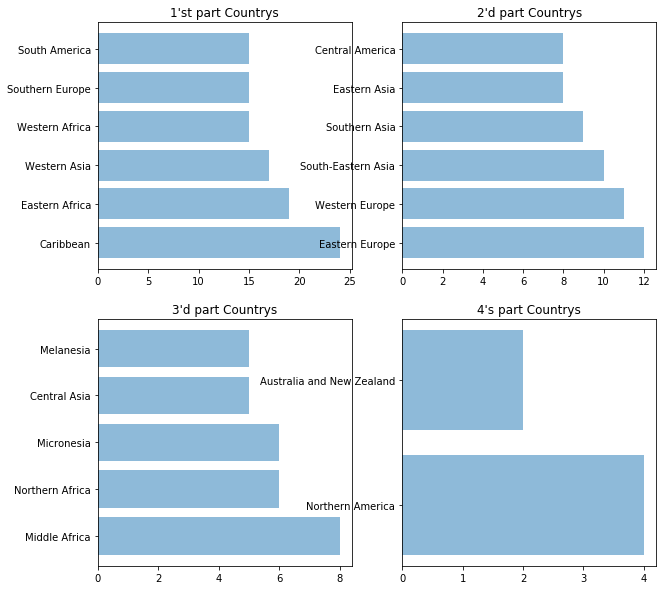

In [6]:
gridsize = (2, 2)
fig1, ax1 = plt.subplots(2,2, figsize = [10,10])
ax1 = ax1.flatten()

ax1[0] = plt.subplot2grid(gridsize, (0, 0))
ax1[0].barh(range_country.index[0:6], dataset['region']['region'].value_counts()[0:6], align='center', alpha=0.5)
ax1[0].set_title("1'st part Countrys")

ax1[1] = plt.subplot2grid(gridsize, (0, 1))
ax1[1].barh(range_country.index[7:13], dataset['region']['region'].value_counts()[7:13], align='center', alpha=0.5)
ax1[1].set_title("2'd part Countrys")

ax1[2] = plt.subplot2grid(gridsize, (1, 0))
ax1[2].barh(range_country.index[14:19], dataset['region']['region'].value_counts()[14:19], align='center', alpha=0.5)
ax1[2].set_title("3'd part Countrys")

ax1[3] = plt.subplot2grid(gridsize, (1, 1))
ax1[3].barh(range_country.index[20:22], dataset['region']['region'].value_counts()[20:22], align='center', alpha=0.5)
ax1[3].set_title("4's part Countrys")

plt.show()

In [7]:
reg_count = {}
reg_count = dataset['GII'].iloc[[7]].T['region'].value_counts()[:22]
reg_count

Western Asia                 15
Southern Europe              12
Western Africa               12
Eastern Africa               11
South America                11
Eastern Europe               11
Northern Europe              10
Central America               8
South-Eastern Asia            8
Western Europe                7
Southern Asia                 6
Eastern Asia                  5
Northern Africa               5
Caribbean                     4
Central Asia                  4
Southern Africa               4
Middle Africa                 3
Australia and New Zealand     2
Northern America              2
Melanesia                     1
Name: region, dtype: int64

In [8]:
#создаю датафраме с суммой gii по регионама и годам
ds_gii_sum = dataset['GII'].iloc[[0,7], :].T.groupby('region').sum().reset_index()
for i  in range(1,7):
    ds_gii_sum = ds_gii_sum.merge(dataset['GII'].iloc[[i,7], :].T.groupby('region').sum().reset_index(), how = 'left')
ds_gii_sum.fillna(0, inplace = True)
ds_gii_sum = ds_gii_sum.iloc[:22]
ds_gii_sum = ds_gii_sum.rename(index = ds_gii_sum['region'])
ds_gii_sum.drop('region', axis = 1, inplace = True)
ds_gii_sum.drop(2019, axis = 1, inplace = True)

#усреднение gii на 1 страну в реионе
for reg in ds_gii_sum.index:
    ds_gii_sum.loc[reg] /= reg_count[reg]
ds_gii_sum

2013        2014        2015        2016  \
Australia and New Zealand   18.000000   17.500000   16.000000   18.000000   
Caribbean                   72.250000   74.000000   75.500000   72.583333   
Central America             85.875000   89.500000   89.375000   86.750000   
Central Asia               108.750000  114.000000  106.750000   97.916667   
Eastern Africa             112.272727  105.636364  105.909091   98.151515   
Eastern Asia                30.800000   26.400000   27.800000   24.200000   
Eastern Europe              49.272727   47.454545   46.000000   46.454545   
Melanesia                   97.000000   95.000000  115.000000  102.333333   
Middle Africa              123.666667  120.000000  113.666667  119.666667   
Northern Africa            109.800000  109.000000  104.200000  102.133333   
Northern America             8.000000    9.000000   10.500000    9.500000   
Northern Europe             15.700000   15.800000   15.600000   15.400000   
South America               74.272727   82.454545   83.545455   81.303030   
South-Eastern Asia          66.500000   67.500000   62.250000   61.250000   
Southern Africa            107.000000  111.000000  109.500000  105.166667   
Southern Asia              112.000000  116.666667  111.166667   97.666667   
Southern Europe             42.916667   46.583333   43.666667   45.916667   
Western Africa             118.000000  116.083333  116.708333  114.638889   
Western Asia                70.066667   70.133333   71.466667   68.200000   
Western Europe              13.714286   13.285714   12.857143   13.285714   

                                 2017        2018  
Australia and New Zealand   22.000000   21.000000  
Caribbean                   73.916667   76.416667  
Central America             87.812500   89.312500  
Central Asia                98.666667   99.166667  
Eastern Africa             102.636364  103.218182  
Eastern Asia                23.000000   21.800000  
Eastern Europe              46.545455   45.363636  
Melanesia                  102.333333  102.333333  
Middle Africa              119.333333  117.333333  
Northern Africa            100.133333   97.733333  
Northern America            11.000000   12.000000  
Northern Europe             16.100000   17.200000  
South America               79.939394   81.212121  
South-Eastern Asia          59.250000   56.500000  
Southern Africa            105.916667  105.416667  
Southern Asia               93.500000   90.500000  
Southern Europe             45.750000   46.250000  
Western Africa             114.388889  115.388889  
Western Asia                68.800000   70.000000  
Western Europe              12.428571   12.714286

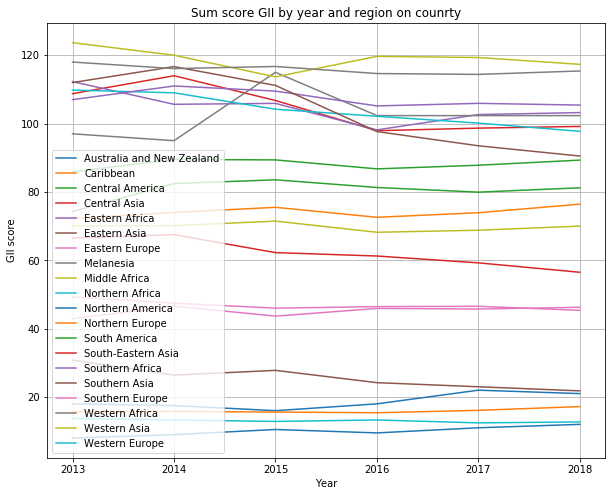

In [9]:
plt.figure(figsize = [10,8])
plt.title('Sum score GII by year and region on counrty')
plt.xlabel('Year')
plt.ylabel('GII score')
plt.grid(axis = 'both')
plt.plot(ds_gii_sum.T)
plt.legend(ds_gii_sum.index)
plt.show()

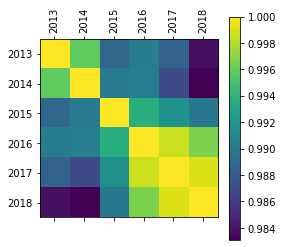

In [10]:
#матрица корреляции GII по годам
f = plt.figure(figsize=(4, 4))
plt.matshow(ds_gii_sum.corr(method ='pearson'), fignum=f.number)
plt.xticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10, rotation=90)
plt.yticks(range(ds_gii_sum.corr(method ='pearson').shape[1]), ds_gii_sum.corr(method ='pearson').columns, fontsize=10)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
#plt.title('Correlation Matrix GII', fontsize=16)

## Исследую интегральные показатели

In [11]:
dataset.keys()

dict_keys(['2013', '2014', '2015', '2016', '2017', '2018', '2019', 'integr_fe', 'region', 'GII', 'GNI'])

In [12]:
integer_fe = dataset['integr_fe']
integer_fe.keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [13]:
#подготавливаю датасет интегральных показателей: добавляю регион, удаляю не нужные столбцы
for i in integer_fe.keys():
    #переимменовываю индесы по столбцу 'Indicator'
    integer_fe[i] = integer_fe[i].rename(index = integer_fe[i]['Indicator'])
    
    # удаляю столюцы 'Indicator' и '201*'
    integer_fe[i].drop(['Indicator'], axis = 1, inplace = True)
    integer_fe[i].drop([list(integer_fe[i])[0]], axis = 1, inplace = True)

In [14]:
#добавляю регион
for df_name in integer_fe.keys():
    integer_fe[df_name] = integer_fe[df_name].append(pd.Series(None, name='region'))
    for i in list(dataset['region']['country']):
            try:
                integer_fe[df_name][i].region = list(dataset['region']['region'].loc[dataset['region']['country'] == i])[0]
            except: pass

D:\Program_Files\Anaconda\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
D:\Program_Files\Anaconda\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [15]:
# pandas в некоторых датасетах не видит числа. Этот код преобразует object в числа
for ds in integer_fe.keys():
    integer_fe[ds].iloc[:4] = integer_fe[ds].iloc[:4].apply(pd.to_numeric, errors='coerce')

In [16]:
#сумма integral fe по регионам и годам на 1 страну в регионе
sum_int_fe = {}
for ds in integer_fe.keys():
    group_intfe = integer_fe[ds].T.groupby('region').sum().reset_index()
    for fe in range(len(list(group_intfe)[1:])-1):
        ife = integer_fe[ds].iloc[[fe, 5]].T.groupby('region').sum().reset_index().iloc[:,1]
        cfe = integer_fe[ds].T.groupby('region').count().reset_index().iloc[:,1]
        group_intfe.iloc[:,fe + 1] = ife / cfe
    sum_int_fe[ds] = group_intfe    

### Загружаю датасет с ВВП по странам с 2013 по 2019 гг.

In [17]:
gni_wb = dataset['GNI']
gni_wb

Aruba        Angola       Albania  United Arab Emirates  \
2013  2.537095e+09  1.268098e+11  1.299652e+10          3.905705e+11   
2014  2.662514e+09  1.368623e+11  1.335045e+10          4.037961e+11   
2015  2.794804e+09  1.102861e+11  1.152102e+10          3.598777e+11   
2016  2.830726e+09  9.585017e+10  1.205434e+10          3.591417e+11   
2017  2.885754e+09  1.146182e+11  1.305373e+10          3.883829e+11   
2018  2.794804e+09  9.352368e+10  1.512983e+10          4.236391e+11   
2019  2.794804e+09  8.719892e+10  1.512160e+10          4.232008e+11   

         Argentina       Armenia  Antigua and Barbuda     Australia  \
2013  5.388603e+11  1.180401e+10         1.142788e+09  1.536980e+12   
2014  5.147058e+11  1.213173e+10         1.185965e+09  1.429083e+12   
2015  5.826447e+11  1.098175e+10         1.263884e+09  1.324064e+12   
2016  5.453392e+11  1.079129e+10         1.328013e+09  1.180244e+12   
2017  6.263150e+11  1.193483e+10         1.400095e+09  1.293973e+12   
2018  5.012443e+11  1.261910e+10         1.527959e+09  1.389127e+12   
2019  4.323023e+11  1.390079e+10         1.628059e+09  1.346629e+12   

           Austria    Azerbaijan  ...  United States of America    Uzbekistan  \
2013  4.312288e+11  7.003672e+10  ...              1.717590e+13  6.931948e+10   
2014  4.425787e+11  7.266244e+10  ...              1.805749e+13  7.777239e+10   
2015  3.780581e+11  5.104664e+10  ...              1.870432e+13  8.327094e+10   
2016  3.951979e+11  3.539543e+10  ...              1.904516e+13  8.271051e+10   
2017  4.145994e+11  3.910606e+10  ...              1.983028e+13  6.037083e+10   
2018  4.542580e+11  4.465335e+10  ...              2.083735e+13  5.189966e+10   
2019  4.459123e+11  4.598663e+10  ...              2.162500e+13  5.879469e+10   

      Saint Vincent and the Grenadines       Vietnam       Vanuatu  \
2013                      7.174866e+08  1.638848e+11  7.969825e+08   
2014                      6.978554e+08  1.773606e+11  8.198440e+08   
2015                      7.371804e+08  1.833205e+11  7.618370e+08   
2016                      7.691900e+08  1.966866e+11  8.022217e+08   
2017                      7.865489e+08  2.069165e+11  8.691737e+08   
2018                      8.031151e+08  2.280568e+11  9.145894e+08   
2019                      8.187931e+08  2.422738e+11  9.259626e+08   

             Samoa        Kosovo         Yemen        Zambia      Zimbabwe  
2013  7.425405e+08  7.236587e+09  3.859962e+10  2.689667e+10  1.721342e+10  
2014  7.271251e+08  7.548252e+09  4.058679e+10  2.659869e+10  1.764328e+10  
2015  7.722542e+08  6.545821e+09  3.562176e+10  2.083134e+10  1.798077e+10  
2016  7.807764e+08  6.800975e+09  2.808468e+10  2.030766e+10  1.877295e+10  
2017  8.053038e+08  7.393009e+09  2.456133e+10  2.472343e+10  2.007960e+10  
2018  7.904918e+08  8.076835e+09  2.757889e+10  2.659825e+10  2.270665e+10  
2019  8.133550e+08  8.092812e+09  3.185322e+10  2.276668e+10  1.983585e+10  

[7 rows x 182 columns]

In [18]:
gii = dataset['GII'].drop(index = 'region', axis  = 1)
gii = gii.astype('float')
gii

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013     93.0    138.0   135.0       56.0     59.0       19.0     23.0   
2014     94.0    133.0   135.0       70.0     65.0       17.0     20.0   
2015     87.0    126.0   120.0       72.0     61.0       17.0     18.0   
2016     92.0    113.0   130.0       81.0     60.0       19.0     20.0   
2017     93.0    108.0   130.0       76.0     59.0       23.0     20.0   
2018     83.0    110.0   130.0       80.0     68.0       20.0     21.0   
2019     83.0    113.0   130.0       73.0     64.0       22.0     21.0   

      Azerbaijan  Bahrain  Bangladesh  ...  United Arab Emirates  \
2013       105.0     67.0       130.0  ...             38.000000   
2014       101.0     62.0       129.0  ...             36.000000   
2015        93.0     59.0       129.0  ...             47.000000   
2016        85.0     57.0       117.0  ...             41.000000   
2017        82.0     66.0       114.0  ...             35.000000   
2018        82.0     72.0       116.0  ...             38.000000   
2019        84.0     78.0       116.0  ...             39.166667   

      United Kingdom  United States of America  Uruguay  Uzbekistan  \
2013             3.0                       5.0     52.0  133.000000   
2014             2.0                       6.0     72.0  128.000000   
2015             2.0                       5.0     68.0  122.000000   
2016             3.0                       4.0     62.0  127.666667   
2017             5.0                       4.0     67.0  127.666667   
2018             4.0                       6.0     62.0  127.666667   
2019             5.0                      36.0     62.0  127.666667   

      Venezuela  Vietnam  Yemen  Zambia    Zimbabwe  
2013      114.0     76.0  142.0   118.0  132.000000  
2014      122.0     71.0  141.0   121.0  130.000000  
2015      132.0     52.0  137.0   124.0  133.000000  
2016      120.0     59.0  128.0   125.0  131.666667  
2017      122.0     47.0  127.0   124.0  121.000000  
2018      122.0     45.0  126.0   120.0  113.000000  
2019      122.0     42.0  129.0   124.0  122.000000  

[7 rows x 141 columns]

## Проверяю гипотезы

In [19]:
ttest_gii_gni = pd.DataFrame(data = None, columns = list(gni_wb), index = ['statistic','pvalue'])

In [20]:
errlog_giigni = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
for col in ttest_gii_gni.columns:
    try:
        ttest_gii_gni.loc['statistic', col] = stats.ttest_ind(gii[col], gni_wb[col]).statistic
        ttest_gii_gni.loc['pvalue', col] = stats.ttest_ind(gii[col], gni_wb[col]).pvalue
    except: errlog_giigni.append(col)

ttest_gii_gni       

Aruba       Angola      Albania United Arab Emirates    Argentina  \
statistic   NaN     -15.7858     -25.4123             -39.0928     -22.9267   
pvalue      NaN  2.16456e-09  8.38131e-12          5.06193e-14  2.81623e-11   

               Armenia Antigua and Barbuda    Australia      Austria  \
statistic     -30.4453                 NaN     -32.1102     -39.5122   
pvalue     9.88637e-13                 NaN  5.25637e-13  4.45753e-14   

            Azerbaijan  ... United States of America   Uzbekistan  \
statistic     -9.28153  ...                 -32.8658     -14.6231   
pvalue     7.96575e-07  ...              3.98788e-13  5.19754e-09   

          Saint Vincent and the Grenadines      Vietnam Vanuatu Samoa Kosovo  \
statistic                              NaN     -18.8304     NaN   NaN    NaN   
pvalue                                 NaN  2.81546e-10     NaN   NaN    NaN   

                 Yemen       Zambia     Zimbabwe  
statistic     -14.1798     -22.6557     -26.7961  
pvalue     7.37991e-09  3.23847e-11  4.48166e-12  

[2 rows x 182 columns]

In [21]:
nulls = ttest_gii_gni.isnull().sum()
nulls[nulls > 0]

Aruba                                           2
Antigua and Barbuda                             2
Burundi                                         2
Commonwealth of The Bahamas                     2
Bhutan                                          2
Republic of the Congo                           2
Republic of the Congo                           2
Comoros                                         2
Cuba                                            2
Curaçao                                         2
Cayman Islands                                  2
Djibouti                                        2
Dominica                                        2
Equatorial Guinea                               2
Grenada                                         2
Haiti                                           2
Isle of Man                                     2
Iraq                                            2
Kiribati                                        2
Saint Kitts and Nevis                           2


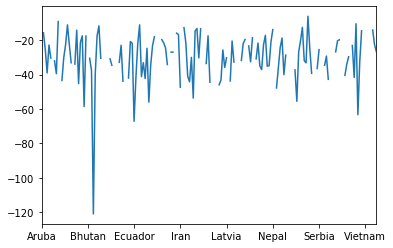

In [22]:
ttest_gii_gni.loc['statistic'].plot()

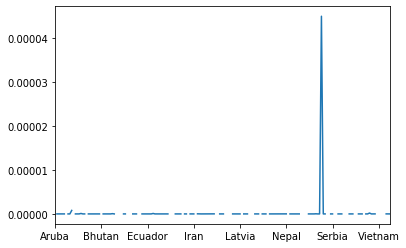

In [23]:
ttest_gii_gni.loc['pvalue'].plot()

In [24]:
ttest_gii_gni.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, statistic to pvalue
Columns: 182 entries, Aruba to Zimbabwe
dtypes: object(182)
memory usage: 2.9+ KB


In [25]:
ttest_gii_gni.describe()

Aruba     Angola    Albania  United Arab Emirates  Argentina  \
count      0   2.000000   2.000000              2.000000   2.000000   
unique     0   2.000000   2.000000              2.000000   2.000000   
top      NaN -15.785817 -25.412335            -39.092769 -22.926738   
freq     NaN   1.000000   1.000000              1.000000   1.000000   

          Armenia Antigua and Barbuda     Australia       Austria  Azerbaijan  \
count    2.000000                   0  2.000000e+00  2.000000e+00    2.000000   
unique   2.000000                   0  2.000000e+00  2.000000e+00    2.000000   
top    -30.445263                 NaN  5.256370e-13  4.457532e-14   -9.281532   
freq     1.000000                 NaN  1.000000e+00  1.000000e+00    1.000000   

        ... United States of America    Uzbekistan  \
count   ...             2.000000e+00  2.000000e+00   
unique  ...             2.000000e+00  2.000000e+00   
top     ...             3.987882e-13  5.197537e-09   
freq    ...             1.000000e+00  1.000000e+00   

        Saint Vincent and the Grenadines       Vietnam  Vanuatu  Samoa  \
count                                  0  2.000000e+00        0      0   
unique                                 0  2.000000e+00        0      0   
top                                  NaN  2.815463e-10      NaN    NaN   
freq                                 NaN  1.000000e+00      NaN    NaN   

        Kosovo      Yemen        Zambia      Zimbabwe  
count        0   2.000000  2.000000e+00  2.000000e+00  
unique       0   2.000000  2.000000e+00  2.000000e+00  
top        NaN -14.179821  3.238469e-11  4.481659e-12  
freq       NaN   1.000000  1.000000e+00  1.000000e+00  

[4 rows x 182 columns]

По всем странам pvalue << меньше порогового значения __0.0005__, чититаем, что данные коррелируют и есть взаимосвязь, следовательно, можно приступать к анализу показателей.

### Проверка гипотезы: интегральные показатели коррелируют с (GNI)

In [26]:
dataset['integr_fe']['int_fe_2013'].index

Index(['Political environment', 'Regulatory environment',
       'Business environment', 'Credit', 'Innovation linkages', 'region'],
      dtype='object')

In [27]:
dataset['integr_fe'].keys()

dict_keys(['int_fe_2013', 'int_fe_2014', 'int_fe_2015', 'int_fe_2016', 'int_fe_2017', 'int_fe_2018', 'int_fe_2019'])

In [28]:
mean_int_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))

In [29]:
i = 0
for ds in dataset['integr_fe'].keys():
    mean_int_fe.iloc[i] = dataset['integr_fe'][ds].drop('region').mean()
    i += 1
mean_int_fe.drop(['Republic of the Congo'], axis = 1, inplace = True)
mean_int_fe

Aruba Angola Albania United Arab Emirates Argentina Armenia  \
2013   NaN    132    80.6                 32.6     107.8    62.2   
2014     0  124.6    85.8                 32.4     114.4    64.6   
2015     0  128.4    79.6                 29.4     113.4    57.4   
2016    76      0      79                 28.2     107.2    64.2   
2017   NaN    NaN    71.2                 29.4     107.8      64   
2018   NaN    NaN      70                 32.6      98.8    72.2   
2019   NaN    NaN     NaN                  NaN       NaN     NaN   

     Antigua and Barbuda Australia Austria Azerbaijan  ...  \
2013                 NaN      17.4    16.2         99  ...   
2014                   0      19.4    18.2       95.6  ...   
2015                   0      16.2    20.4       93.6  ...   
2016                  76        17    21.8       81.4  ...   
2017                 NaN      20.2    21.8       76.6  ...   
2018                 NaN      18.4    23.2       73.2  ...   
2019                 NaN       NaN     NaN        NaN  ...   

     United States of America Uzbekistan Saint Vincent and the Grenadines  \
2013                       12      120.8                              NaN   
2014                     15.6        119                                0   
2015                       12      107.4                                0   
2016                       13          0                               76   
2017                       12        NaN                              NaN   
2018                     10.6        NaN                              NaN   
2019                      NaN        NaN                              NaN   

     Vietnam Vanuatu Samoa Kosovo  Yemen Zambia Zimbabwe  
2013    90.8     NaN   NaN    NaN  129.8   93.6    122.4  
2014    94.2       0     0      0  128.2   86.6      114  
2015    90.4       0     0      0  120.6   87.4    123.2  
2016    87.2      76    76     76  122.8   91.2        0  
2017    78.4     NaN   NaN    NaN  118.2   92.2      113  
2018    71.4     NaN   NaN    NaN    122   94.8    115.4  
2019     NaN     NaN   NaN    NaN    NaN    NaN      NaN  

[7 rows x 180 columns]

In [30]:
nulls = mean_int_fe.isnull().sum()
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 180 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia                                         4
Saint Lucia

In [31]:
#заполняю пропуски
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_int_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_int_fe[i] = mean_int_fe[i].fillna(mean_int_fe[i].mean())
mean_int_fe

Angola  Albania  United Arab Emirates   Argentina  Armenia  Australia  \
2013  132.00     80.6             32.600000  107.800000     62.2       17.4   
2014  124.60     85.8             32.400000  114.400000     64.6       19.4   
2015  128.40     79.6             29.400000  113.400000     57.4       16.2   
2016    0.00     79.0             28.200000  107.200000     64.2       17.0   
2017   96.25     71.2             29.400000  107.800000     64.0       20.2   
2018   96.25     70.0             32.600000   98.800000     72.2       18.4   
2019   96.25     77.7             30.766667  108.233333     64.1       18.1   

        Austria  Azerbaijan  Burundi  Belgium  ...   Tanzania     Uganda  \
2013  16.200000   99.000000     0.00     21.2  ...  77.800000  80.800000   
2014  18.200000   95.600000   108.60     24.4  ...  82.800000  72.000000   
2015  20.400000   93.600000   101.00     28.4  ...  79.600000  81.000000   
2016  21.800000   81.400000    93.20     32.8  ...  84.600000  70.800000   
2017  21.800000   76.600000    88.00     33.4  ...  79.600000  73.400000   
2018  23.200000   73.200000    78.16     30.2  ...  71.600000  72.200000   
2019  20.266667   86.566667    78.16     28.4  ...  79.333333  75.033333   

        Ukraine    Uruguay  United States of America  Uzbekistan  Vietnam  \
2013  92.600000  75.800000                 12.000000       120.8     90.8   
2014  94.000000  81.600000                 15.600000       119.0     94.2   
2015  91.600000  77.200000                 12.000000       107.4     90.4   
2016  86.400000  71.600000                 13.000000         0.0     87.2   
2017  85.000000  73.400000                 12.000000        86.8     78.4   
2018  89.400000  69.600000                 10.600000        86.8     71.4   
2019  89.833333  74.866667                 12.533333        86.8     85.4   

      Yemen     Zambia  Zimbabwe  
2013  129.8  93.600000     122.4  
2014  128.2  86.600000     114.0  
2015  120.6  87.400000     123.2  
2016  122.8  91.200000       0.0  
2017  118.2  92.200000     113.0  
2018  122.0  94.800000     115.4  
2019  123.6  90.966667      98.0  

[7 rows x 140 columns]

In [32]:
ttest_int_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])
errlog_int_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий стран
for col in ttest_int_fe.columns:
    try:
        ttest_int_fe.loc['statistic', col] = stats.ttest_ind(mean_int_fe[col], gni_wb[col]).statistic
        ttest_int_fe.loc['pvalue', col] = stats.ttest_ind(mean_int_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)

ttest_int_fe 

Angola      Albania United Arab Emirates    Argentina  \
statistic     -15.7858     -25.4123             -39.0928     -22.9267   
pvalue     2.16456e-09  8.38131e-12          5.06193e-14  2.81623e-11   

               Armenia    Australia      Austria   Azerbaijan      Burundi  \
statistic     -30.4453     -32.1102     -39.5122     -9.28153     -30.3968   
pvalue     9.88637e-13  5.25637e-13  4.45753e-14  7.96575e-07  1.00747e-12   

              Belgium  ...     Tanzania       Uganda      Ukraine  \
statistic    -43.4753  ...     -23.2084      -41.715     -10.5516   
pvalue     1.4262e-14  ...  2.43968e-11  2.33486e-14  1.99881e-07   

               Uruguay United States of America   Uzbekistan      Vietnam  \
statistic     -63.3008                 -32.8658     -14.6231     -18.8304   
pvalue     1.60048e-16              3.98788e-13  5.19754e-09  2.81546e-10   

                 Yemen       Zambia     Zimbabwe  
statistic     -14.1798     -22.6557     -26.7961  
pvalue     7.37991e-09  3.23847e-11  4.48166e-12  

[2 rows x 140 columns]

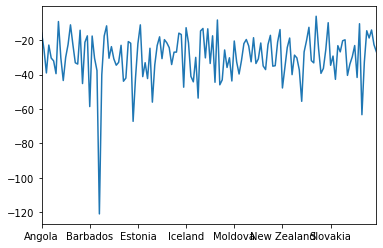

In [33]:
ttest_int_fe.loc['statistic'].plot()

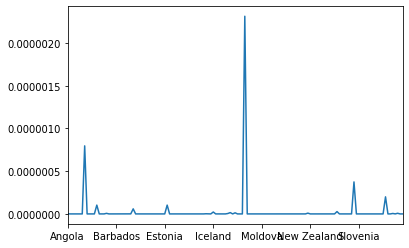

In [34]:
ttest_int_fe.loc['pvalue'].drop('Sudan').plot()

In [35]:
ttest_int_fe_T = ttest_int_fe.T
ttest_int_fe_T.sort_values('pvalue', ascending=True, inplace=True)
ttest_int_fe_T[ttest_int_fe_T['pvalue'] == ttest_int_fe.loc['pvalue'].max()]

statistic       pvalue
Sudan  -6.21398  4.49096e-05

### Проверка гипотезы: показатели государственной поддержки коррелируют с GNI

In [36]:
mean_fe = pd.DataFrame(data = None, columns = list(gni_wb), index = list(gni_wb.index))
i = 0
for ds in list(dataset.keys())[:7]:
    mean_fe.iloc[i] = dataset[ds].mean()
    i += 1
mean_fe.drop(['Republic of the Congo'], axis = 1, inplace = True)
mean_fe

Aruba   Angola  Albania United Arab Emirates Argentina  Armenia  \
2013   NaN  97.3514  69.8919              32.7297   68.7568  58.2162   
2014     0  94.0286  66.3429              33.4571   72.8857  60.6286   
2015     0  91.0312  66.0625              28.4375     75.75   57.375   
2016    36        0  64.8214                29.25   75.1786  56.1429   
2017   NaN      NaN  66.1071              26.1071   75.3214  61.8214   
2018   NaN      NaN  63.7037               24.963   69.9259  60.7037   
2019   NaN      NaN      NaN                  NaN   70.1538      NaN   

     Antigua and Barbuda Australia  Austria Azerbaijan  ...  \
2013                 NaN   24.8108  24.7027    78.0541  ...   
2014                   0   23.4571  27.2857    73.2571  ...   
2015                   0   26.0312  23.7812      73.25  ...   
2016                  36   19.6786  22.9286    67.8929  ...   
2017                 NaN   20.0357  21.5714    64.4643  ...   
2018                 NaN   19.7778  22.4815    63.7778  ...   
2019                 NaN   19.8462  21.5385        NaN  ...   

     United States of America Uzbekistan Saint Vincent and the Grenadines  \
2013                  21.2973    62.3784                              NaN   
2014                  24.3429    68.9714                                0   
2015                  22.0625    61.9375                                0   
2016                  20.1071          0                               36   
2017                  20.1071        NaN                              NaN   
2018                  18.8148        NaN                              NaN   
2019                      NaN        NaN                              NaN   

      Vietnam Vanuatu Samoa Kosovo    Yemen   Zambia Zimbabwe  
2013  64.8108     NaN   NaN    NaN  88.6757  69.5676  78.1622  
2014  69.1143       0     0      0  85.8857  65.1143  81.8571  
2015  68.6875       0     0      0  82.6562  64.1875  84.6875  
2016  63.3929      36    36     36  68.1429  65.5714        0  
2017  66.2857     NaN   NaN    NaN  78.4286  68.4286  76.5357  
2018  63.4815     NaN   NaN    NaN  81.7037   75.963  79.3333  
2019      NaN     NaN   NaN    NaN      NaN      NaN      NaN  

[7 rows x 180 columns]

In [37]:
nulls = mean_fe.isnull().sum()
print('Количество стран в датсете с пропусками:', len(nulls), '\n')
print('Страны с пропущенными значениями более 3:')
print(nulls[nulls > 3])

Количество стран в датсете с пропусками: 180 

Страны с пропущенными значениями более 3:
Aruba                                           4
Antigua and Barbuda                             4
Commonwealth of The Bahamas                     4
Bhutan                                          4
Comoros                                         4
Cuba                                            4
Curaçao                                         4
Cayman Islands                                  4
Djibouti                                        4
Dominica                                        4
Equatorial Guinea                               4
Grenada                                         4
Haiti                                           4
Isle of Man                                     4
Iraq                                            4
Kiribati                                        4
Saint Kitts and Nevis                           4
Liberia                                         4
Saint Lucia

In [38]:
#заплняю пропуски
for i in nulls[nulls > 0].keys():
    if i in nulls[nulls > 3]:
        mean_fe.drop(i, axis = 1, inplace = True)
    else: 
        mean_fe[i] = mean_fe[i].fillna(mean_fe[i].mean())
mean_fe

Angola    Albania  United Arab Emirates Argentina    Armenia  \
2013  97.351351  69.891892             32.729730   68.7568  58.216216   
2014  94.028571  66.342857             33.457143   72.8857  60.628571   
2015  91.031250  66.062500             28.437500     75.75  57.375000   
2016   0.000000  64.821429             29.250000   75.1786  56.142857   
2017  70.602793  66.107143             26.107143   75.3214  61.821429   
2018  70.602793  63.703704             24.962963   69.9259  60.703704   
2019  70.602793  66.154921             29.157413   70.1538  59.147963   

     Australia  Austria  Azerbaijan    Burundi  Belgium  ...   Tanzania  \
2013   24.8108  24.7027   78.054054   0.000000       24  ...  71.243243   
2014   23.4571  27.2857   73.257143  86.828571  28.8571  ...  73.800000   
2015   26.0312  23.7812   73.250000  82.031250  33.1562  ...  75.687500   
2016   19.6786  22.9286   67.892857  79.250000  29.0714  ...  82.142857   
2017   20.0357  21.5714   64.464286  78.714286  28.7857  ...  76.357143   
2018   19.7778  22.4815   63.777778  65.364821   26.037  ...  74.481481   
2019   19.8462  21.5385   70.116020  65.364821  25.3077  ...  75.618704   

         Uganda  Ukraine    Uruguay  United States of America  Uzbekistan  \
2013  76.108108  66.8919  61.189189                 21.297297   62.378378   
2014  71.800000  67.9429  61.428571                 24.342857   68.971429   
2015  70.437500  67.3125  60.750000                 22.062500   61.937500   
2016  66.357143  63.6071  56.428571                 20.107143    0.000000   
2017  68.857143  62.9286  59.750000                 20.107143   48.321827   
2018  68.074074  65.6296  59.407407                 18.814815   48.321827   
2019  70.272328       65  59.825623                 21.121959   48.321827   

        Vietnam      Yemen     Zambia   Zimbabwe  
2013  64.810811  88.675676  69.567568  78.162162  
2014  69.114286  85.885714  65.114286  81.857143  
2015  68.687500  82.656250  64.187500  84.687500  
2016  63.392857  68.142857  65.571429   0.000000  
2017  66.285714  78.428571  68.428571  76.535714  
2018  63.481481  81.703704  75.962963  79.333333  
2019  65.962108  80.915462  68.138719  66.762642  

[7 rows x 140 columns]

In [39]:
ttest_fe = pd.DataFrame(data = None, columns = mean_int_fe.columns, index = ['statistic','pvalue'])
errlog_fe = list() #пременная для отлова пустых столбщов из-за не несовпадения названий
for col in ttest_fe.columns:
    try:
        ttest_fe.loc['statistic', col] = stats.ttest_ind(mean_fe[col], gni_wb[col]).statistic
        ttest_fe.loc['pvalue', col] = stats.ttest_ind(mean_fe[col], gni_wb[col]).pvalue
    except: errlog_int_fe.append(col)
ttest_fe 

Angola      Albania United Arab Emirates    Argentina  \
statistic     -15.7858     -25.4123             -39.0928     -22.9267   
pvalue     2.16456e-09  8.38131e-12          5.06193e-14  2.81623e-11   

               Armenia    Australia      Austria   Azerbaijan      Burundi  \
statistic     -30.4453     -32.1102     -39.5122     -9.28153     -30.3968   
pvalue     9.88637e-13  5.25637e-13  4.45753e-14  7.96575e-07  1.00747e-12   

              Belgium  ...     Tanzania       Uganda      Ukraine  \
statistic    -43.4753  ...     -23.2084      -41.715     -10.5516   
pvalue     1.4262e-14  ...  2.43968e-11  2.33486e-14  1.99881e-07   

               Uruguay United States of America   Uzbekistan      Vietnam  \
statistic     -63.3008                 -32.8658     -14.6231     -18.8304   
pvalue     1.60048e-16              3.98788e-13  5.19754e-09  2.81546e-10   

                 Yemen       Zambia     Zimbabwe  
statistic     -14.1798     -22.6557     -26.7961  
pvalue     7.37991e-09  3.23847e-11  4.48166e-12  

[2 rows x 140 columns]

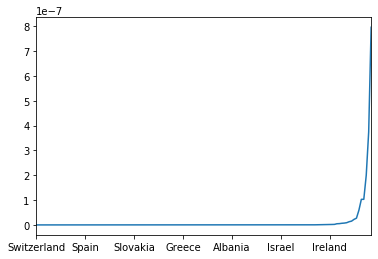

In [40]:
#без выбросов: 1 и 2 МАХ значения
ttest_fe.T.sort_values('pvalue',ascending=True)['pvalue'][:-2].plot()

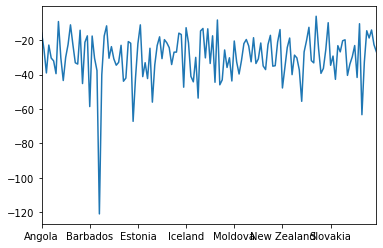

In [41]:
ttest_int_fe .loc['statistic'].plot()

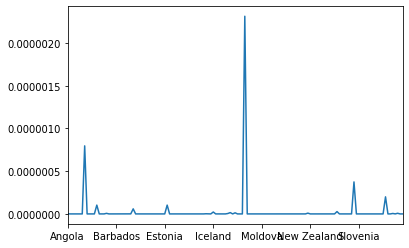

In [42]:
ttest_int_fe.loc['pvalue'].drop('Sudan').plot()

## Заключение 
Как видно из последнего графика, для, покрайней мере 140 стран, показатели Global Innovation Index (GII) и Gross Natural Income (GNI) имеют сильную корреляцию. Даже при снижения порога до 0.00005, или 0.000005 зависимость так же остаётся очевидной.  
При очищении показателя GII до показателей иллюстирирующих государственную поддержку, зависимость от GNI не тольоко остаётся, но даже её характер не изменяется. 
Из исследования следует, что меры государственной поддержки инновационной системы напрямую влияют на её ВВП и справедливы для всех стран.

ООН выделяет три группы стран по уровню социально-экономического развития:

• развитые страны (developed countries)  
• страны с переходной экономикой (transition countries)  
• развивающиеся страны (developing countries)

Гипотезы:
1) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNI;  
2) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GII;  
3) Каждую страну в каждом году можно отнести к какой либо группе (классу) по GNi + GII;  
4) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 5 интегральным показателям;  
5) Каждую страну в каждом году можно отнести к какой либо группе (классу) по 37 показателям;  
6) Существуют показатели (из набора 37) для каждой страны которые им необходимо подтянуть для перехода в следующий класс.

#### Подготовка датасета GNI и GII для кластеризации

In [43]:
gni_kl = gni_wb.astype('float')
gii_kl = gii.iloc[:7].astype('float')

In [44]:
gii_kl

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013     93.0    138.0   135.0       56.0     59.0       19.0     23.0   
2014     94.0    133.0   135.0       70.0     65.0       17.0     20.0   
2015     87.0    126.0   120.0       72.0     61.0       17.0     18.0   
2016     92.0    113.0   130.0       81.0     60.0       19.0     20.0   
2017     93.0    108.0   130.0       76.0     59.0       23.0     20.0   
2018     83.0    110.0   130.0       80.0     68.0       20.0     21.0   
2019     83.0    113.0   130.0       73.0     64.0       22.0     21.0   

      Azerbaijan  Bahrain  Bangladesh  ...  United Arab Emirates  \
2013       105.0     67.0       130.0  ...             38.000000   
2014       101.0     62.0       129.0  ...             36.000000   
2015        93.0     59.0       129.0  ...             47.000000   
2016        85.0     57.0       117.0  ...             41.000000   
2017        82.0     66.0       114.0  ...             35.000000   
2018        82.0     72.0       116.0  ...             38.000000   
2019        84.0     78.0       116.0  ...             39.166667   

      United Kingdom  United States of America  Uruguay  Uzbekistan  \
2013             3.0                       5.0     52.0  133.000000   
2014             2.0                       6.0     72.0  128.000000   
2015             2.0                       5.0     68.0  122.000000   
2016             3.0                       4.0     62.0  127.666667   
2017             5.0                       4.0     67.0  127.666667   
2018             4.0                       6.0     62.0  127.666667   
2019             5.0                      36.0     62.0  127.666667   

      Venezuela  Vietnam  Yemen  Zambia    Zimbabwe  
2013      114.0     76.0  142.0   118.0  132.000000  
2014      122.0     71.0  141.0   121.0  130.000000  
2015      132.0     52.0  137.0   124.0  133.000000  
2016      120.0     59.0  128.0   125.0  131.666667  
2017      122.0     47.0  127.0   124.0  121.000000  
2018      122.0     45.0  126.0   120.0  113.000000  
2019      122.0     42.0  129.0   124.0  122.000000  

[7 rows x 141 columns]

##### Scaling GNI и GII

In [45]:
scaler_gni = StandardScaler()
scaler_gii = StandardScaler()

gni_sc = scaler_gni.fit_transform(gni_kl)
gii_sc = scaler_gii.fit_transform(gii_kl)

In [46]:
# 3 кластера
kmeans_gni = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)
kmeans_gii = KMeans(n_clusters = 3, random_state = 42, n_jobs = -1)

In [47]:
for i in range(gni_sc.shape[0]):
    gni_kmeans = kmeans_gni.fit(gni_sc[0].reshape(-1, 1))
    print('Year:', gni_kl.index[i])
    print('GNI labels count:')
    x = gni_kmeans.labels_
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    print(np.vstack((ii,y[ii])).T, '\n')

Year: 2013
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2014
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2015
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2016
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2017
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2018
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 

Year: 2019
GNI labels count:
[[ 0 75]
 [ 1 53]
 [ 2 54]] 



Классы распределены равномерно.
Необходимо проверить, как влияет на количество кластеров scale и нормирование. Для модели предпочтительно иметь как можно большее количество класов, поскольку это повысит количество границ перехода страны из класса в класс и может показать более точно показатели, которые влияют на этот переход.

#### Поиск оптимального количества классов для scaled GNI

No handles with labels found to put in legend.


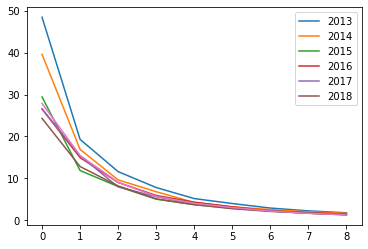

In [48]:
fig, ax = plt.subplots()

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(gni_sc.shape[0]):
    ssd = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300, n_jobs = -1)
        kmeans.fit(gni_sc[i].reshape(-1, 1))
        ssd.append(kmeans.inertia_)
    ax.legend()
    plt.plot(ssd, label = gni_kl.index[i])

In [49]:
range_n_clusters = [2, 3, 4, 5, 6, 7]

for i in range(gni_sc.shape[0]):
    print('GNI. Year:', gni_kl.index[i])
    for num_clusters in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300)
        kmeans.fit(gni_sc[i].reshape(-1, 1))
    
        cluster_labels = kmeans.labels_
    
        # silhouette score
        silhouette_avg = silhouette_score(gni_sc[i].reshape(-1, 1), cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    print('\n')

GNI. Year: 2013
For n_clusters=2, the silhouette score is 0.6504806943379849
For n_clusters=3, the silhouette score is 0.6382289352152193
For n_clusters=4, the silhouette score is 0.6124794904954693
For n_clusters=5, the silhouette score is 0.5610674346978062
For n_clusters=6, the silhouette score is 0.5650535148208509
For n_clusters=7, the silhouette score is 0.5674626857030849


GNI. Year: 2014
For n_clusters=2, the silhouette score is 0.6341639873833601
For n_clusters=3, the silhouette score is 0.6218379805360618
For n_clusters=4, the silhouette score is 0.620184585891721
For n_clusters=5, the silhouette score is 0.6150406483029238
For n_clusters=6, the silhouette score is 0.6248744149084665
For n_clusters=7, the silhouette score is 0.6162576937346205


GNI. Year: 2015
For n_clusters=2, the silhouette score is 0.5879769963554254
For n_clusters=3, the silhouette score is 0.6153861764518366
For n_clusters=4, the silhouette score is 0.5510311269615301
For n_clusters=5, the silhouette s

Максимальное значение silhouette score зависит от года и колеблется от 2 до 4. Однозначно сложно определить количество классов. Целесообразно использовать ещё одну проверку - MeanShift().

In [50]:
#Проверяю исходный GNI с помощью MeanShift() на количество классов
count = int()
for i in range(gni_sc.shape[0]):
    print('GNI. Year:', gni_kl.index[i])
    ms = MeanShift()
    ms.fit(gni_sc[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GNI. Year: 2013
Estimated clusters: 4 

GNI. Year: 2014
Estimated clusters: 3 

GNI. Year: 2015
Estimated clusters: 4 

GNI. Year: 2016
Estimated clusters: 5 

GNI. Year: 2017
Estimated clusters: 2 

GNI. Year: 2018
Estimated clusters: 3 

GNI. Year: 2019
Estimated clusters: 4 

Среднеарифметическое количество кластеров: 4


Организация объединённых наций разделяет страны по GNI на 3 класса, однако, как видно, класс страны сильно колеблется от года, по этому целесообразно разделять страны на 4 класса.

#### Поиск оптимального количества классов для scaled GII

In [51]:
for i in range(gii_sc.shape[0]):
    gii_kmeans = kmeans_gii.fit(gii_sc[0].reshape(-1, 1))
    print('Year:', gii_kl.index[i])
    print('GII labels count:')
    x = gii_kmeans.labels_
    y = np.bincount(x)
    ii = np.nonzero(y)[0]
    print(np.vstack((ii,y[ii])).T, '\n')

Year: 2013
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2014
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2015
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2016
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2017
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2018
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 

Year: 2019
GII labels count:
[[ 0 43]
 [ 1 60]
 [ 2 38]] 



No handles with labels found to put in legend.


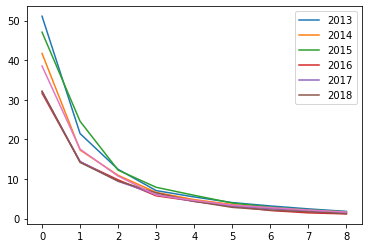

In [52]:
# Поиск оптимального количества классов для GII
fig, ax = plt.subplots()

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for i in range(gii_sc.shape[0]):
    ssd = []
    for num_clusters in range_n_clusters:
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300, n_jobs = -1)
        kmeans.fit(gii_sc[i].reshape(-1, 1))
        ssd.append(kmeans.inertia_)
    ax.legend()
    plt.plot(ssd, label = gii_kl.index[i])

In [53]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 9, 10]

for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    for num_clusters in range_n_clusters:
        # intialise kmeans
        kmeans = KMeans(n_clusters = num_clusters, random_state = 42, max_iter = 300)
        kmeans.fit(gii_sc[i].reshape(-1, 1))
    
        cluster_labels = kmeans.labels_
    
        # silhouette score
        silhouette_avg = silhouette_score(gii_sc[i].reshape(-1, 1), cluster_labels)
        print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    print('\n')

GII. Year: 2013
For n_clusters=2, the silhouette score is 0.671414655291795
For n_clusters=3, the silhouette score is 0.638682244234715
For n_clusters=4, the silhouette score is 0.6066377345619604
For n_clusters=5, the silhouette score is 0.6080052543431153
For n_clusters=6, the silhouette score is 0.5861622925489324
For n_clusters=7, the silhouette score is 0.5639520131328558
For n_clusters=9, the silhouette score is 0.5751786922771861
For n_clusters=10, the silhouette score is 0.5838879892100933


GII. Year: 2014
For n_clusters=2, the silhouette score is 0.6007150949244249
For n_clusters=3, the silhouette score is 0.625034381227043
For n_clusters=4, the silhouette score is 0.5759156212906873
For n_clusters=5, the silhouette score is 0.5803813760156137
For n_clusters=6, the silhouette score is 0.5840163792143278
For n_clusters=7, the silhouette score is 0.5791612171071677
For n_clusters=9, the silhouette score is 0.5916924754548443
For n_clusters=10, the silhouette score is 0.61690392

In [54]:
#Проверяю scaled GII с помощью MeanShift() на количество классов
count = int()
for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    ms = MeanShift()
    ms.fit(gii_sc[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GII. Year: 2013
Estimated clusters: 3 

GII. Year: 2014
Estimated clusters: 3 

GII. Year: 2015
Estimated clusters: 3 

GII. Year: 2016
Estimated clusters: 3 

GII. Year: 2017
Estimated clusters: 2 

GII. Year: 2018
Estimated clusters: 4 

GII. Year: 2019
Estimated clusters: 2 

Среднеарифметическое количество кластеров: 3


In [55]:
#Проверяю scaled GII с помощью MeanShift() на количество классов
gii_nrm = normalize(gii_kl)

count = int()
for i in range(gii_sc.shape[0]):
    print('GII. Year:', gii_kl.index[i])
    ms = MeanShift()
    ms.fit(gii_nrm[i].reshape(-1, 1))
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднеарифметическое количество кластеров:', round(count/i))

GII. Year: 2013
Estimated clusters: 4 

GII. Year: 2014
Estimated clusters: 4 

GII. Year: 2015
Estimated clusters: 3 

GII. Year: 2016
Estimated clusters: 4 

GII. Year: 2017
Estimated clusters: 3 

GII. Year: 2018
Estimated clusters: 3 

GII. Year: 2019
Estimated clusters: 3 

Среднеарифметическое количество кластеров: 4


Проверка MeanShift() показалала, что количество класов для GII, как и GNI так же меняется год от года. Cреднеарифметическое количество классов равно 4, это значение и буду использовать.

---

## Интегральные показатели   
* Political environment  
* Regulatory environment  
* Credit	  
* Innovation linkages

In [56]:
# привожу к одной шкале датасет 'integr_fe'
intfe_dict_sc = {}
scaler_inffe = StandardScaler()

for ds in dataset['integr_fe'].keys():
    intfe_dict_sc[ds] = scaler_inffe.fit_transform(dataset['integr_fe'][ds].drop('region', axis = 0).astype('float').T)

In [57]:
# нормализация даттых
intfe_dict_nrm = {}
for ds in intfe_dict_sc.keys():    
    intfe_dict_nrm[ds] = normalize(intfe_dict_sc[ds])

In [58]:
# применяю MeanShift к scaled датасет 'integr_fe'
count = int()
n_clusters_ = int()
for ds in dataset['integr_fe'].keys():
    ms = MeanShift()
    ms.fit(intfe_dict_sc[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(cluster_centers.shape)    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднее количество кластров:', round(count/len(dataset['integr_fe'].keys())))

int_fe_2013
(4, 148)
Estimated clusters: 4 

int_fe_2014
(3, 224)
Estimated clusters: 3 

int_fe_2015
(1, 224)
Estimated clusters: 1 

int_fe_2016
(2, 224)
Estimated clusters: 2 

int_fe_2017
(4, 126)
Estimated clusters: 4 

int_fe_2018
(3, 125)
Estimated clusters: 3 

int_fe_2019
(4, 127)
Estimated clusters: 4 

Среднее количество кластров: 3


In [59]:
# применяю MeanShift к нормализованному датасету
count = int()
for ds in intfe_dict_nrm.keys():
    ms = MeanShift()
    ms.fit(intfe_dict_nrm[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(cluster_centers.shape)    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднее количества кластров:', count/len(intfe_dict_nrm.keys()))
print('Среднее количество кластров:', round(count/len(intfe_dict_nrm.keys())))

int_fe_2013
(4, 148)
Estimated clusters: 4 

int_fe_2014
(3, 224)
Estimated clusters: 3 

int_fe_2015
(4, 224)
Estimated clusters: 4 

int_fe_2016
(3, 224)
Estimated clusters: 3 

int_fe_2017
(3, 126)
Estimated clusters: 3 

int_fe_2018
(3, 125)
Estimated clusters: 3 

int_fe_2019
(4, 127)
Estimated clusters: 4 

Среднее количества кластров: 3.4285714285714284
Среднее количество кластров: 3


In [60]:
#применяю плавающее количество кластеров, подобно GII
kmeans_fe_fl = {
    'int_fe_2013' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    'int_fe_2014' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2015' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    'int_fe_2016' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2017' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2018' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    'int_fe_2019' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1) }

intfe_dict_kmeans_fl_labels = {}
intfe_dict_kmeans_fl_fe = {}
count = int()

for ds in intfe_dict_nrm.keys():
    intfe_dict_kmeans_fl_labels[ds] = kmeans_fe_fl[ds].fit(intfe_dict_nrm[ds])
    intfe_dict_kmeans_fl_fe[ds] = kmeans_fe_fl[ds].fit_transform(intfe_dict_nrm[ds])
    count += len(np.unique(intfe_dict_kmeans_fl_labels[ds].labels_)) 
    #печать 
    print(ds)
    print('Количество кластеров:', len(np.unique(intfe_dict_kmeans_fl_labels[ds].labels_)))
    print(intfe_dict_kmeans_fl_fe[ds].shape, '\n')
print('Среднее количества кластров:', count/len(intfe_dict_nrm.keys()))
print('Среднее количество кластров:', round(count/len(intfe_dict_nrm.keys())))

int_fe_2013
Количество кластеров: 4
(148, 4) 

int_fe_2014
Количество кластеров: 3
(224, 3) 

int_fe_2015
Количество кластеров: 4
(224, 4) 

int_fe_2016
Количество кластеров: 3
(224, 3) 

int_fe_2017
Количество кластеров: 3
(126, 3) 

int_fe_2018
Количество кластеров: 3
(125, 3) 

int_fe_2019
Количество кластеров: 4
(127, 4) 

Среднее количества кластров: 3.4285714285714284
Среднее количество кластров: 3


#### Допущение: страна сохраняят своё положение относительно других классов при увеличение количества классов.
Принимаем количество кластеров равное 4

In [61]:
# 4 класса и нормализованные данные
# рассчёт классов и координат KMeans()
kmeans_fe = {}
n_cls = 4

for key in intfe_dict_nrm.keys():
    kmeans_fe[key] = KMeans(n_clusters = n_cls, random_state = 42, n_jobs = -1)
    
intfe_dict_kmeans_nrm_labels = {}
intfe_dict_kmeans_nrm_fe = {}

for ds_sc in intfe_dict_sc.keys():
    intfe_dict_kmeans_nrm_labels[ds_sc] = kmeans_fe[ds_sc].fit(intfe_dict_nrm[ds_sc])
    intfe_dict_kmeans_nrm_fe[ds_sc] = kmeans_fe[ds_sc].fit_transform(intfe_dict_nrm[ds_sc])

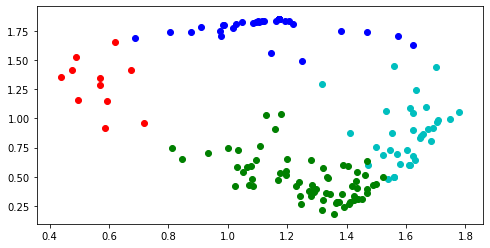

In [62]:
#визуализация 4 классоов для int_fe_2013
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2014'].labels_

a = 0
b = 1
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

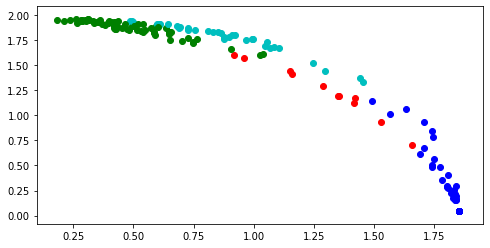

In [63]:
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2014'].labels_

a = 1
b = 2
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

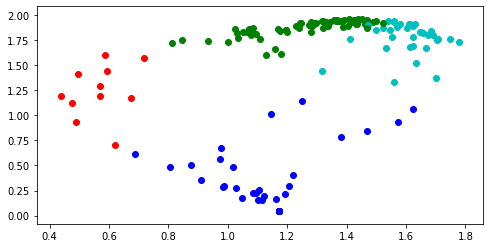

In [64]:
fig, ax = plt.subplots()
colors = 1000*['r','g','b','c','k','y','m']

labels = intfe_dict_kmeans_nrm_labels['int_fe_2014'].labels_

a = 0
b = 2
for i in range(len(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a])):
    ax.scatter(intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[a][i], 
               intfe_dict_kmeans_nrm_fe['int_fe_2014'].T[b][i], c = colors[labels[i]])
fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

Наверное в 4-мернон пространстве точки лучше кластеризубтся :)

Визуализация нормализованного датасета интегральных показателей

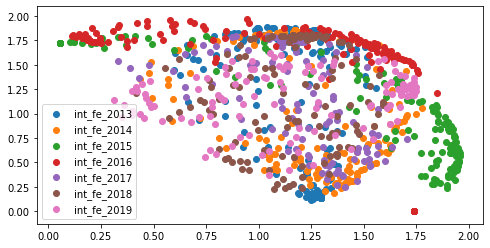

In [65]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[a], intfe_dict_kmeans_nrm_fe[i].T[b], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)
plt.show()

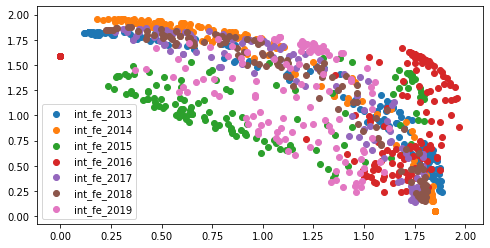

In [66]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[c], intfe_dict_kmeans_nrm_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)    
plt.show()

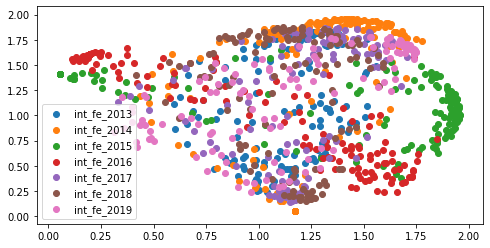

In [67]:
e = 0 # range (0,2)
f = 2 # range (0,2)

fig, ax = plt.subplots()
for i in intfe_dict_kmeans_nrm_fe.keys():
    ax.scatter(intfe_dict_kmeans_nrm_fe[i].T[e], intfe_dict_kmeans_nrm_fe[i].T[f], label = i)
    ax.legend()

fig.set_figheight(4)
fig.set_figwidth(8)    
plt.show()

Очевидно, сто страны меняют своё положение в классах от года к году  

Сокращаю размерность для визуализации хотя бы в 3D

In [68]:
# снижение размерности с помощью TSNE
kmeans3_fe = {}
intfe_dict_kmeans3_labels = {}
intfe_dict_kmeans3_fe = {}

for key in intfe_dict_nrm.keys():
    kmeans3_fe[key] = KMeans(n_clusters = n_cls, random_state = 42, n_jobs = -1)

for ds in intfe_dict_kmeans_nrm_fe.keys():
    intfe_dict_kmeans3_fe[ds] = TSNE(n_components = 3, 
                                     perplexity = 5,
                                     learning_rate = 100,
                                     n_iter_without_progress = 500, method = 'exact').fit_transform(intfe_dict_kmeans_nrm_fe[ds])
    intfe_dict_kmeans3_labels[ds] = kmeans3_fe[ds].fit(intfe_dict_kmeans3_fe[ds])

#### Графики в 3Д

In [69]:
x = intfe_dict_kmeans3_fe['int_fe_2013'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2013'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2013'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2013'].labels_)
fig.show()

In [70]:
x = intfe_dict_kmeans3_fe['int_fe_2014'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2014'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2014'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2014'].labels_)
fig.show()

In [71]:
x = intfe_dict_kmeans3_fe['int_fe_2015'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2015'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2015'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2015'].labels_)
fig.show()

In [72]:
x = intfe_dict_kmeans3_fe['int_fe_2016'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2016'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2016'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2016'].labels_)
fig.show()

In [73]:
x = intfe_dict_kmeans3_fe['int_fe_2017'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2017'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2017'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2017'].labels_)
fig.show()

In [74]:
x = intfe_dict_kmeans3_fe['int_fe_2018'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2018'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2018'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2018'].labels_)
fig.show()

In [75]:
x = intfe_dict_kmeans3_fe['int_fe_2019'].T[0]
y = intfe_dict_kmeans3_fe['int_fe_2019'].T[1]
z = intfe_dict_kmeans3_fe['int_fe_2019'].T[2]
fig = px.scatter_3d(x=x, y=y, z=z, color = intfe_dict_kmeans3_labels['int_fe_2019'].labels_)
fig.show()

---

### Набор из 37 показателей, характеризующих государственную поддержку инновационной системы страны

Проверяю количество классов для pack_37

In [76]:
pack37 = {}
for ds in list(dataset.keys())[:7]:
    pack37[ds] = dataset[ds]

In [77]:
# привожу шкалы датасето 37 показателей к одной
pack37_sc = {}
scaler_pack37 = StandardScaler()

for ds in list(dataset.keys())[:7]:
    pack37_sc[ds] = scaler_pack37.fit_transform(dataset[ds].drop([dataset[ds].columns[0], 
                                                               dataset[ds].columns[1]], axis = 1).astype('float').T)
# нормализаци данных
pack37_nrm = {}
for ds in list(dataset.keys())[:7]:
    pack37_nrm[ds] =  normalize(pack37_sc[ds])

In [78]:
# 4 класса - беру по аналогии с GII и GNI, предполагаю, что количество кластеров транслируется 'вниз'
# формирование словаря KMeans
kmeans_pack37 = {}
kmeans_pack37_nrm = {}
n_clusters = 4

for key in pack37_sc.keys():
    kmeans_pack37[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
    
    #нормализованныt данные
    kmeans_pack37_nrm[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
     
# рассчёт KMeans для scale датасета
pack37_kmeans_labels = {}
pack37_kmeans_fe = {}

#нормализованные данные
pack37_kmeans_labels_nrm = {}
pack37_kmeans_fe_nrm = {}

for ds in pack37_sc.keys():
    # scale датасет
    pack37_kmeans_labels[ds] = kmeans_pack37[ds].fit(pack37_sc[ds])
    pack37_kmeans_fe[ds] =  kmeans_pack37[ds].fit_transform(pack37_sc[ds])
    
    #нормализованные данные
    pack37_kmeans_labels_nrm[ds] = kmeans_pack37_nrm[ds].fit(pack37_nrm[ds])
    pack37_kmeans_fe_nrm[ds] =  kmeans_pack37_nrm[ds].fit_transform(pack37_nrm[ds])        

In [79]:
# применяю MeanShift к нормализованному датасету
count = int()
for ds in pack37_kmeans_fe_nrm.keys():
    ms = MeanShift()
    ms.fit(pack37_kmeans_fe_nrm[ds].T)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    n_clusters_ = len(np.unique(labels))
    count += n_clusters_
    print(ds)
    print(cluster_centers.shape)    
    print("Estimated clusters:", n_clusters_, '\n')
print('Среднее количества кластров:', count/len(pack37_kmeans_fe_nrm.keys()))
print('Среднее количество кластров:', round(count/len(pack37_kmeans_fe_nrm.keys())))

2013
(3, 148)
Estimated clusters: 3 

2014
(2, 224)
Estimated clusters: 2 

2015
(3, 224)
Estimated clusters: 3 

2016
(2, 224)
Estimated clusters: 2 

2017
(4, 126)
Estimated clusters: 4 

2018
(3, 125)
Estimated clusters: 3 

2019
(2, 127)
Estimated clusters: 2 

Среднее количества кластров: 2.7142857142857144
Среднее количество кластров: 3


In [80]:
#применяю плавающее количество кластеров
kmeans_37_fe_fl = {
    '2013' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    '2014' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2015' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1),
    '2016' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2017' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2018' : KMeans(n_clusters = 3, random_state = 42, n_jobs = -1),
    '2019' : KMeans(n_clusters = 4, random_state = 42, n_jobs = -1) }

In [81]:
# плавающее количество классов
pack37_dict_kmeans_fl_labels = {}
pack37_dict_kmeans_fl_fe = {}
count = int()

for ds in pack37_sc.keys():
    pack37_dict_kmeans_fl_labels[ds] = kmeans_37_fe_fl[ds].fit(pack37_kmeans_fe_nrm[ds])
    pack37_dict_kmeans_fl_fe[ds] = kmeans_37_fe_fl[ds].fit_transform(pack37_kmeans_fe_nrm[ds])
    count += len(np.unique(pack37_dict_kmeans_fl_labels[ds].labels_)) 
    #результаты
    print(ds)
    print('Количество кластеров:', len(np.unique(pack37_dict_kmeans_fl_labels[ds].labels_)))
    print(pack37_dict_kmeans_fl_fe[ds].shape, '\n')
print('Среднее количества кластров:', count/len(pack37_dict_kmeans_fl_labels.keys()))
print('Среднее количество кластров:', round(count/len(pack37_dict_kmeans_fl_labels.keys())))

2013
Количество кластеров: 4
(148, 4) 

2014
Количество кластеров: 3
(224, 3) 

2015
Количество кластеров: 4
(224, 4) 

2016
Количество кластеров: 3
(224, 3) 

2017
Количество кластеров: 3
(126, 3) 

2018
Количество кластеров: 3
(125, 3) 

2019
Количество кластеров: 4
(127, 4) 

Среднее количества кластров: 3.4285714285714284
Среднее количество кластров: 3


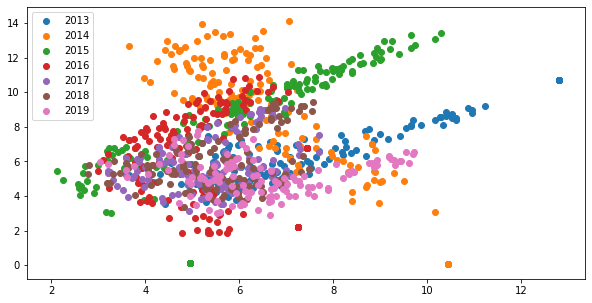

In [82]:
a = 0 # range (0,2)
b = 1 # range (0,2)

fig, ax = plt.subplots()

for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[a], pack37_kmeans_fe[i].T[b], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

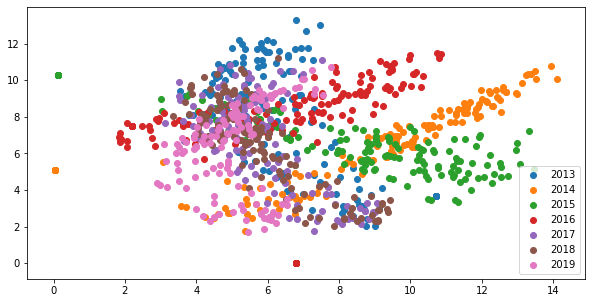

In [83]:
c = 1 # range (0,2)
d = 2 # range (0,2)

fig, ax = plt.subplots()
for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[c], pack37_kmeans_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

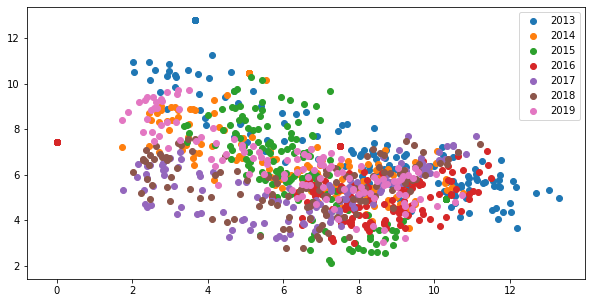

In [84]:
c = 2 # range (0,2)
d = 0 # range (0,2)

fig, ax = plt.subplots()
for i in pack37_kmeans_fe.keys():
    ax.scatter(pack37_kmeans_fe[i].T[c], pack37_kmeans_fe[i].T[d], label = i)
    ax.legend()

fig.set_figheight(5)
fig.set_figwidth(10) 
plt.show()

In [85]:
for i in pack37_kmeans_fe.keys():
    x = pack37_kmeans_fe[i].T[0]
    y = pack37_kmeans_fe[i].T[1]
    z = pack37_kmeans_fe[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans_labels[i].labels_, title = i)
    fig.show()

Пересчитываю датасет на 4 классов

In [86]:
# формирование словаря KMeans
kmeans3_pack37 = {}
kmeans3_pack37_nrm = {}
n_clusters = 4

for key in pack37_nrm.keys():
    kmeans3_pack37[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)
    
    #нормализованный данные
    kmeans3_pack37_nrm[key] = KMeans(n_clusters = n_clusters, random_state = 42, n_jobs = -1)

In [87]:
# рассчёт KMeans для датасета
pack37_kmeans3_labels = {}
pack37_kmeans3_fe = {}

#нормализованные данные
pack37_kmeans3_labels_nrm = {}
pack37_kmeans3_fe_nrm = {}

for ds in pack37_nrm.keys():
    pack37_kmeans3_labels[ds] = kmeans3_pack37[ds].fit(pack37_sc[ds])
    pack37_kmeans3_fe[ds] =  kmeans3_pack37[ds].fit_transform(pack37_sc[ds])
    
    #нормализованные данные
    pack37_kmeans3_labels_nrm[ds] = kmeans3_pack37_nrm[ds].fit(pack37_nrm[ds])
    pack37_kmeans3_fe_nrm[ds] =  kmeans3_pack37_nrm[ds].fit_transform(pack37_nrm[ds])  

In [88]:
#визуализация распределения по классам не нормированных данных
for i in pack37_kmeans3_fe.keys():
    x = pack37_kmeans3_fe[i].T[0]
    y = pack37_kmeans3_fe[i].T[1]
    z = pack37_kmeans3_fe[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels[i].labels_, title = i)
    fig.show()

In [89]:
#визуализация распределения по классам нормированных данных
for i in pack37_kmeans3_fe_nrm.keys():
    x = pack37_kmeans3_fe_nrm[i].T[0]
    y = pack37_kmeans3_fe_nrm[i].T[1]
    z = pack37_kmeans3_fe_nrm[i].T[2]
    fig = px.scatter_3d(x=x, y=y, z=z, color = pack37_kmeans3_labels_nrm[i].labels_, title = i)
    fig.show()

Расперделение нормализованных данных на 4 класса мне кажется более чётким. Считаю, что использование 4 классов оправдано.

In [90]:
#Нормализованный датасет с классами стран
pack37_labels_nrm = pd.DataFrame()
lebels_2013 = pd.Series(data = pack37_kmeans3_labels_nrm['2013'].labels_,index = pack37['2013'].columns[2:], name = '2013')
lebels_2014 = pd.Series(data = pack37_kmeans3_labels_nrm['2014'].labels_,index = pack37['2014'].columns[2:], name = '2014')
lebels_2015 = pd.Series(data = pack37_kmeans3_labels_nrm['2015'].labels_,index = pack37['2015'].columns[2:], name = '2015')
lebels_2016 = pd.Series(data = pack37_kmeans3_labels_nrm['2016'].labels_,index = pack37['2016'].columns[2:], name = '2016')
lebels_2017 = pd.Series(data = pack37_kmeans3_labels_nrm['2017'].labels_,index = pack37['2017'].columns[2:], name = '2017')
lebels_2018 = pd.Series(data = pack37_kmeans3_labels_nrm['2018'].labels_,index = pack37['2018'].columns[2:], name = '2018')
lebels_2019 = pd.Series(data = pack37_kmeans3_labels_nrm['2019'].labels_,index = pack37['2019'].columns[2:], name = '2019')
pack37_labels_nrm = pack37_labels_nrm.append([lebels_2013,lebels_2014,lebels_2015,lebels_2016, lebels_2017,lebels_2018, lebels_2019])
pack37_labels_nrm += 1
pack37_labels_nrm.fillna(0, inplace = True)
pack37_labels_nrm

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013      2.0      2.0     3.0        4.0      2.0        1.0      1.0   
2014      3.0      4.0     3.0        4.0      4.0        1.0      1.0   
2015      4.0      2.0     2.0        4.0      4.0        1.0      1.0   
2016      4.0      4.0     2.0        1.0      4.0        2.0      2.0   
2017      3.0      1.0     0.0        4.0      3.0        2.0      2.0   
2018      4.0      1.0     0.0        2.0      4.0        3.0      3.0   
2019      1.0      2.0     0.0        3.0      1.0        4.0      4.0   

      Azerbaijan  Bahrain  Bangladesh  ...  South Sudan  \
2013         2.0      1.0         3.0  ...          0.0   
2014         4.0      3.0         3.0  ...          2.0   
2015         4.0      2.0         2.0  ...          3.0   
2016         4.0      1.0         4.0  ...          3.0   
2017         3.0      2.0         1.0  ...          0.0   
2018         1.0      2.0         1.0  ...          0.0   
2019         1.0      4.0         2.0  ...          0.0   

      Democratic Republic of Timor-Leste  Tokelau  Tonga  Turkmenistan  \
2013                                 0.0      0.0    0.0           0.0   
2014                                 2.0      2.0    2.0           2.0   
2015                                 3.0      3.0    3.0           3.0   
2016                                 3.0      3.0    3.0           3.0   
2017                                 0.0      0.0    0.0           0.0   
2018                                 0.0      0.0    0.0           0.0   
2019                                 0.0      0.0    0.0           0.0   

      Turks and Caicos Islands  Tuvalu  Vanuatu  Virgin Islands, British  \
2013                       0.0     0.0      0.0                      0.0   
2014                       2.0     2.0      2.0                      2.0   
2015                       3.0     3.0      3.0                      3.0   
2016                       3.0     3.0      3.0                      3.0   
2017                       0.0     0.0      0.0                      0.0   
2018                       0.0     0.0      0.0                      0.0   
2019                       0.0     0.0      0.0                      0.0   

      Virgin Islands, U.S.  
2013                   0.0  
2014                   2.0  
2015                   3.0  
2016                   3.0  
2017                   0.0  
2018                   0.0  
2019                   0.0  

[7 rows x 224 columns]

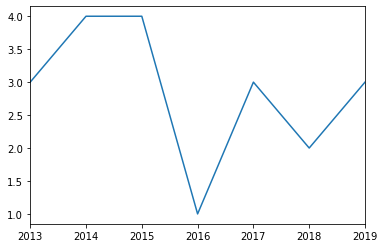

In [91]:
country = "Russian Federation"
pack37_labels_nrm[country].plot()

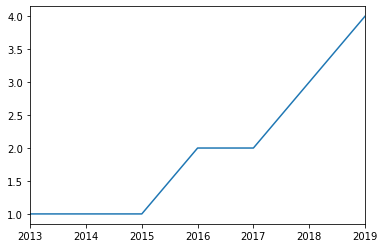

In [92]:
country = "United States of America"
pack37_labels_nrm[country].plot()

Исходный датасет

In [93]:
#датасет с классами стран
pack37_labels = pd.DataFrame()
lebels_2013 = pd.Series(data = pack37_kmeans_labels['2013'].labels_, index = pack37['2013'].columns[2:], name = '2013')
lebels_2014 = pd.Series(data = pack37_kmeans_labels['2014'].labels_,index = pack37['2014'].columns[2:], name = '2014')
lebels_2015 = pd.Series(data = pack37_kmeans_labels['2015'].labels_,index = pack37['2015'].columns[2:], name = '2015')
lebels_2016 = pd.Series(data = pack37_kmeans_labels['2016'].labels_,index = pack37['2016'].columns[2:], name = '2016')
lebels_2017 = pd.Series(data = pack37_kmeans_labels['2017'].labels_,index = pack37['2017'].columns[2:], name = '2017')
lebels_2018 = pd.Series(data = pack37_kmeans_labels['2018'].labels_,index = pack37['2018'].columns[2:], name = '2018')
lebels_2019 = pd.Series(data = pack37_kmeans_labels['2019'].labels_,index = pack37['2019'].columns[2:], name = '2019')
pack37_labels = pack37_labels.append([lebels_2013,lebels_2014,lebels_2015,lebels_2016, lebels_2017,lebels_2018, lebels_2019])
pack37_labels += 1
pack37_labels.fillna(0, inplace = True)
pack37_labels

Albania  Algeria  Angola  Argentina  Armenia  Australia  Austria  \
2013      2.0      1.0     1.0        2.0      2.0        3.0      3.0   
2014      4.0      4.0     1.0        4.0      4.0        3.0      3.0   
2015      4.0      4.0     3.0        4.0      4.0        1.0      1.0   
2016      1.0      4.0     2.0        1.0      1.0        2.0      2.0   
2017      1.0      4.0     0.0        2.0      1.0        3.0      3.0   
2018      1.0      2.0     0.0        4.0      1.0        3.0      3.0   
2019      2.0      4.0     0.0        2.0      2.0        3.0      3.0   

      Azerbaijan  Bahrain  Bangladesh  ...  South Sudan  \
2013         2.0      4.0         1.0  ...          0.0   
2014         4.0      3.0         1.0  ...          2.0   
2015         4.0      1.0         3.0  ...          2.0   
2016         1.0      1.0         4.0  ...          3.0   
2017         1.0      1.0         4.0  ...          0.0   
2018         1.0      4.0         2.0  ...          0.0   
2019         2.0      2.0         1.0  ...          0.0   

      Democratic Republic of Timor-Leste  Tokelau  Tonga  Turkmenistan  \
2013                                 0.0      0.0    0.0           0.0   
2014                                 2.0      2.0    2.0           2.0   
2015                                 2.0      2.0    2.0           2.0   
2016                                 3.0      3.0    3.0           3.0   
2017                                 0.0      0.0    0.0           0.0   
2018                                 0.0      0.0    0.0           0.0   
2019                                 0.0      0.0    0.0           0.0   

      Turks and Caicos Islands  Tuvalu  Vanuatu  Virgin Islands, British  \
2013                       0.0     0.0      0.0                      0.0   
2014                       2.0     2.0      2.0                      2.0   
2015                       2.0     2.0      2.0                      2.0   
2016                       3.0     3.0      3.0                      3.0   
2017                       0.0     0.0      0.0                      0.0   
2018                       0.0     0.0      0.0                      0.0   
2019                       0.0     0.0      0.0                      0.0   

      Virgin Islands, U.S.  
2013                   0.0  
2014                   2.0  
2015                   2.0  
2016                   3.0  
2017                   0.0  
2018                   0.0  
2019                   0.0  

[7 rows x 224 columns]

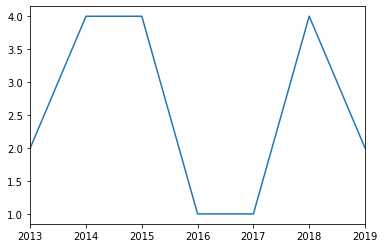

In [94]:
country = "Russian Federation"
pack37_labels[country].plot()

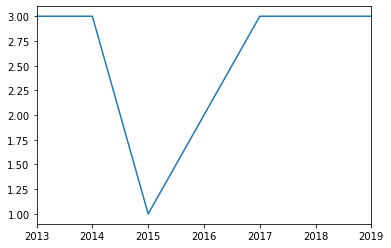

In [95]:
country = "United States of America"
pack37_labels[country].plot()

In [96]:
#Составляю словарь с нумерации страны
col_list = list()
col_dict = {}

for ds in pack37.keys():
    for col in pack37[ds].columns[2:]:
        col_list.append(col)
col_list = list(unique_everseen(col_list))

i = 0
for col in col_list:
    col_dict[col] = i
    i += 1

country_ind = pd.DataFrame(data = None, columns = list(col_dict.keys()), index = pack37.keys())
country_dict = {}
err_list = []

for ds in pack37.keys():
    for col in country_ind.loc[ds].index:
        if col in pack37[ds].columns:
            country_ind.loc[ds][col] = col_dict[col]
        else: 
            err_list.append(col)
            country_ind[col].loc[ds] = np.nan
country_ind

Albania Algeria Angola Argentina Armenia Australia Austria Azerbaijan  \
2013       0       1      2         3       4         5       6          7   
2014       0       1      2         3       4         5       6          7   
2015       0       1      2         3       4         5       6          7   
2016       0       1      2         3       4         5       6          7   
2017       0       1    NaN         3       4         5       6          7   
2018       0       1    NaN         3       4         5       6          7   
2019       0       1    NaN         3       4         5       6          7   

     Bahrain Bangladesh  ... South Sudan Democratic Republic of Timor-Leste  \
2013       8          9  ...         NaN                                NaN   
2014       8          9  ...         214                                215   
2015       8          9  ...         214                                215   
2016       8          9  ...         214                                215   
2017       8          9  ...         NaN                                NaN   
2018       8          9  ...         NaN                                NaN   
2019       8          9  ...         NaN                                NaN   

     Tokelau Tonga Turkmenistan Turks and Caicos Islands Tuvalu Vanuatu  \
2013     NaN   NaN          NaN                      NaN    NaN     NaN   
2014     216   217          218                      219    220     221   
2015     216   217          218                      219    220     221   
2016     216   217          218                      219    220     221   
2017     NaN   NaN          NaN                      NaN    NaN     NaN   
2018     NaN   NaN          NaN                      NaN    NaN     NaN   
2019     NaN   NaN          NaN                      NaN    NaN     NaN   

     Virgin Islands, British Virgin Islands, U.S.  
2013                     NaN                  NaN  
2014                     222                  223  
2015                     222                  223  
2016                     222                  223  
2017                     NaN                  NaN  
2018                     NaN                  NaN  
2019                     NaN                  NaN  

[7 rows x 224 columns]

Гипотеза 1: Изменнее показателей pack 37 оказывает влияние на класс страны. Если гипотеза 1 верна, то суз=ществуют такие показатели из pack 37, которые оказывают наибольшее влияние на класс страны.

Зачиммость. Взять страны класса 3 и 4. Сравнить из показатели pack 37  
Гипотеза: показатели стран 3 класса ниже показателей стран 4.  
Можно взять изменения к предыдущему году каждого показателя по стране и посмотреть в каких годах менялся класс.

In [97]:
def prep_dfs(df,df_lab, year1, year2, class1, class2):
    country_y1_y2 = []
    country1  = list(df_lab.loc[year1][df_lab.loc[year1] == class1].index)
    country2  = list(df_lab.loc[year1][df_lab.loc[year2] == class2].index)
    for country in country1:
        if country in country2:
            country_y1_y2.append(country)
    temp_pack37 = df[year1][country_y1_y2] - df[year2][country_y1_y2]
    temp_pack37.dropna(axis = 0, inplace = True)
    return temp_pack37

In [98]:
# функция возврящает индексы показатеоей по правилу Паретто: возвращает индексы датафрейма и наименование страны
# на вход подаётся датафрейм сразницей показателей
def significant_parameters(df):
    dict_param = {}
    for df_columns in df:
        f = []
        temp_df = df[df_columns].loc[df[df_columns] < 0].sort_values(ascending=True)
        summa = temp_df.iloc[0]
        f.append(df[df_columns].loc[df[df_columns] < 0].sort_values(ascending=True).index[0])          
        for ind in range(1, len(df.index)):
            if summa / temp_df.sum() <= .8:
                summa += temp_df.iloc[ind]
                f.append(list(temp_df.index)[ind])
            else:
                break
        dict_param[df_columns] = f
    return dict_param

In [102]:
#Модель работает по алгоритму:
# из датасета pack37[year1] и pack37[year2] берёт датасет страны class1 и class2 соотвественно котрые есть в обоих годах
# затем вычитает эти два датасета
# после вычета берёт индексы показателей сумма показателей которых >= 80% от суммы показателей страны для каждой страы
# и возвращает эти показатели
sign_par = {}
year1 = '2014' #year1 должен быть больше year2 и находится в диапахоне от 2013 до 2019
year2 = '2013'
class1 = 4 # класс в year1
class2 = 2 # класс в year2

temp_pack37 = prep_dfs(pack37, pack37_labels, year1, year2, class1, class2)

sign_par = significant_parameters(temp_pack37)

if bool(sign_par) == True:
    for key in sign_par:
        print(key)
        print(pack37[year1]['Indicator'].loc[sign_par[key]], '\n')
else:
       print("Стран с такими параметрами не найдено")

Albania
73             Joint venture/strategic alliance deals
74    Patent families filed in at least three offices
79              Foreign direct investment net inflows
Name: Indicator, dtype: object 

Argentina
74    Patent families filed in at least three offices
42                              Logistics performance
Name: Indicator, dtype: object 

Armenia
73               Joint venture/strategic alliance deals
52      Microfinance institutions' gross loan portfolio
74      Patent families filed in at least three offices
8     Political stability and absence of violence/te...
Name: Indicator, dtype: object 

Azerbaijan
79              Foreign direct investment net inflows
52    Microfinance institutions' gross loan portfolio
16                        Ease of starting a business
Name: Indicator, dtype: object 

Belarus
52      Microfinance institutions' gross loan portfolio
8     Political stability and absence of violence/te...
Name: Indicator, dtype: object 

Botswana
52    Microfi

In [103]:
list_param = []
for key in sign_par.keys():
    for i in range(0, len(sign_par[key])):
        list_param.append(sign_par[key][i])

print('Стран в выборке:', len(sign_par.keys()))
print('Частота показателей:')
for i in set(list_param):
    print(i, ':', list_param.count(i))

Стран в выборке: 41
Частота показателей:
32 : 4
8 : 3
73 : 21
74 : 17
42 : 18
9 : 2
12 : 3
13 : 1
79 : 11
16 : 4
17 : 4
18 : 5
52 : 20
21 : 1
54 : 10
25 : 15
27 : 2
28 : 3
